In [1]:
import matplotlib.pyplot as plt
import numpy as np

In a simple linear regression, we have the following,

$
\begin{bmatrix}
y_{1}\\
y_{2}\\
\vdots \\
y_{n}
\end{bmatrix} = 
\begin{bmatrix}
1 & x_{1} \\
1 & x_{2} \\
1 & \vdots \\
1 & x_{n}
\end{bmatrix} * 
\begin{bmatrix}
\beta_{0} \\
\beta_{1} 
\end{bmatrix} + 
\begin{bmatrix}
\varepsilon_{0} \\
\varepsilon_{1} \\
\vdots \\
\varepsilon_{n} 
\end{bmatrix}
$

$ \text{where y = }
\begin{bmatrix}
y_{1}\\
y_{2}\\
\vdots \\
y_{n}
\end{bmatrix},
\text{X = }
\begin{bmatrix}
1 & x_{1} \\
1 & x_{2} \\
1 & \vdots \\
1 & x_{n}
\end{bmatrix},
\beta{} = 
\begin{bmatrix}
\beta_{0} \\
\beta_{1} 
\end{bmatrix},
\varepsilon_{} =
\begin{bmatrix}
\varepsilon_{0} \\
\varepsilon_{1} \\
\vdots \\
\varepsilon_{n} 
\end{bmatrix}
$

$ \text{Hence, expressing the above in matrix notation, we have } y = X\beta + \varepsilon $

### Linear Regression using Linear Algebra

1. Generate random datapoint $ x $ and $ y $ with noise

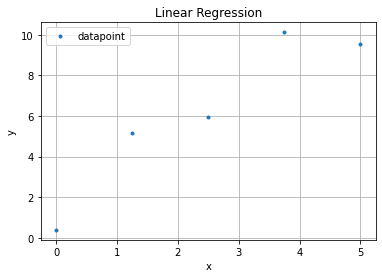

In [2]:
x = np.linspace(0,5,5)
noise = np.random.normal(0,1,5)

y = 2*x+1 + noise

plt.plot(x, y, '.', label='datapoint')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [3]:
print('x is ',x)
print('y is ',y)

x is  [0.   1.25 2.5  3.75 5.  ]
y is  [ 0.3820877   5.1527661   5.95621977 10.12354313  9.54720834]


2. Transform $ x $ datapoint into matrix $ X $ <br>

$\text{X = }
\begin{bmatrix}
1 & x_{1} \\
1 & x_{2} \\
1 & \vdots \\
1 & x_{n}
\end{bmatrix}$

In [4]:
X = np.asarray([np.ones(5), x]).T
print(X)

[[1.   0.  ]
 [1.   1.25]
 [1.   2.5 ]
 [1.   3.75]
 [1.   5.  ]]


3. Find the transpose of matrix $ X $, i.e. $ X^{T} $

In [5]:
XT = np.matrix.transpose(X)
print(XT)

[[1.   1.   1.   1.   1.  ]
 [0.   1.25 2.5  3.75 5.  ]]


4. Multiply $ X^{T} $ and $ X $

In [6]:
XT_X = np.matmul(XT, X)
print(XT_X)

[[ 5.    12.5  ]
 [12.5   46.875]]


5. Multiply $ X^{T} $ and $ y $

In [7]:
XT_y = np.matmul(XT,y)
print(XT_y)

[ 31.16182505 107.03083552]


6. Compute the inverse of $ X^{T}X $

In [8]:
np.linalg.inv(XT_X)

array([[ 0.6  , -0.16 ],
       [-0.16 ,  0.064]])

7. To solve for $ \beta_{0} $ and $ \beta_{1} $, we multiply the inverse of matrix $ X^{T}X $ with $ X^{T}y $ <br>
<br>
i.e. $ \beta = (X^{T}X )^{-1} \bullet X^{T}y $

In [9]:
beta0, beta1 = np.matmul(np.linalg.inv(XT_X), XT_y)
print(beta0, beta1)

1.5721613473534788 1.864081465090484


8. Using $ \beta_{0} $ and $ \beta_{1} $ we obtained above, we estimate for $ y $ <br>
<br>
i.e. $ \hat{y}  = \hat{\beta_{0}} + \hat{\beta_{1}}X $

In [10]:
y_hat = beta0 + beta1*x
print(y_hat)

[ 1.57216135  3.90226318  6.23236501  8.56246684 10.89256867]


9. Plotting the linear regression line together with the datapoints

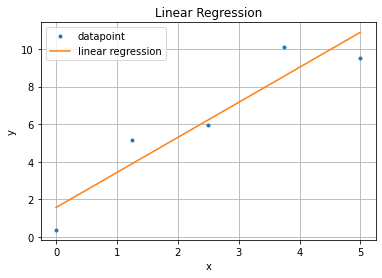

In [11]:
plt.plot(x, y, '.', label='datapoint')
plt.plot(x, y_hat, '-', label='linear regression')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()